# **IMPORTING LIBRARY**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **IMPORTING DATASET**

In [35]:
df=pd.read_csv("/content/drive/MyDrive/Raw Data Set Decoder/heart data.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# **CHECKING SHAPE**

In [36]:
df.shape

(299, 13)

# **CHECKING FOR NULL VALUES**

In [37]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# **CHECKING DESCRIPTION**

In [38]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# **COUNT PLOT OF TARGET FEATURES**

In [39]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

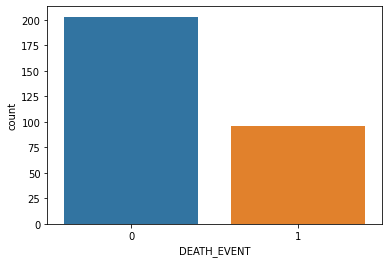

In [40]:
sns.countplot(x='DEATH_EVENT',data=df)

# **FINDING THE CORRELTION BETWEEN DIFFERENT FEATURES**

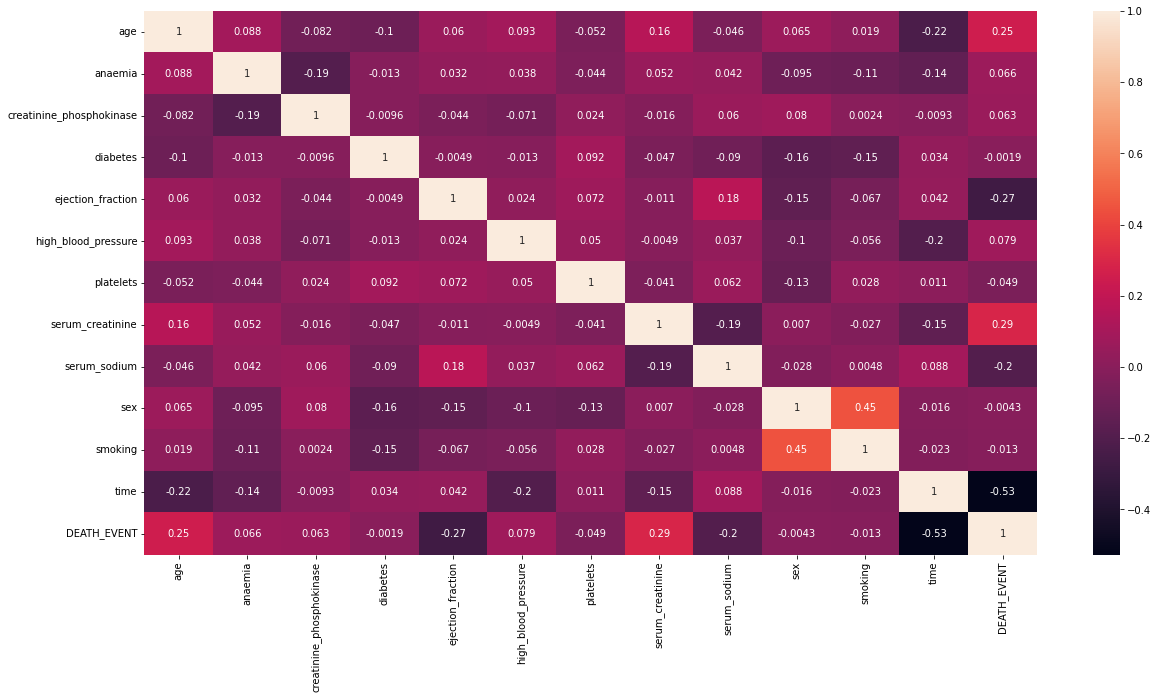

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# **FEATURE IMPORTANCE**

In [42]:
from sklearn.ensemble import ExtraTreesClassifier

[0.09517337 0.02405331 0.07830956 0.03075167 0.12973737 0.02441095
 0.0674658  0.12276093 0.0859373  0.02587459 0.02940775 0.2861174 ]


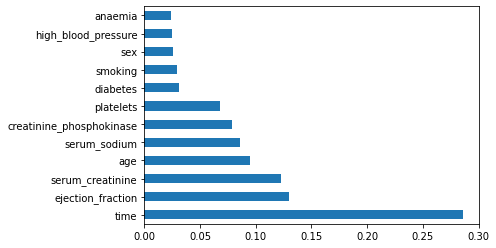

In [43]:
x=df.drop(columns="DEATH_EVENT")
y=df["DEATH_EVENT"]
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

# **SPLITING THE DATA AND FEATURES SCALING**

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
inp_data=df.iloc[:,[0,2,4,7,8,11]]
out_data=df["DEATH_EVENT"]
x_train,x_test,y_train,y_test=train_test_split(inp_data,out_data)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [46]:
print('x_train Shape', x_train.shape)
print('x_test Shape', x_test.shape)
print('y_train Shape', y_train.shape)
print('x_test Shape', x_test.shape)

x_train Shape (224, 6)
x_test Shape (75, 6)
y_train Shape (224,)
x_test Shape (75, 6)


# **BUILDING A MODEL AND EVALUATING MODELS**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix
from sklearn.metrics import r2_score,roc_auc_score,roc_curve,classification_report

In [48]:
clf_1=DecisionTreeClassifier(random_state=0)
clf_1.fit(x_train,y_train)
y_pred=clf_1.predict(x_test)
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print("Decision Tree Classifir f1-score         : {:.4f}".format(f1_score(y_test,y_pred)))
print("Decision Tree Classifir precision        : {:.4f}".format(precision_score(y_test,y_pred)))
print("Decision Tree Classifir recall           : {:.4f}".format(recall_score(y_test,y_pred)))
print("Decision Tree Classifir roc auc score    : {:.4f}".format(roc_auc_score(y_test,y_pred)))
print("\n", classification_report(y_pred,y_test))

Accuracy Score: 0.8267
Decision Tree Classifir f1-score         : 0.7111
Decision Tree Classifir precision        : 0.7619
Decision Tree Classifir recall           : 0.6667
Decision Tree Classifir roc auc score    : 0.7843

               precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.67      0.76      0.71        21

    accuracy                           0.83        75
   macro avg       0.78      0.81      0.79        75
weighted avg       0.84      0.83      0.83        75



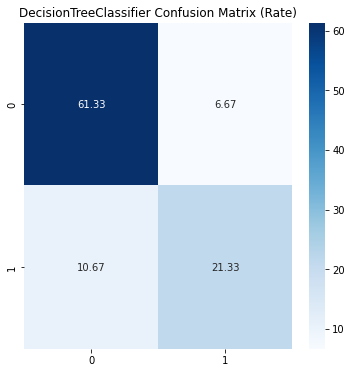

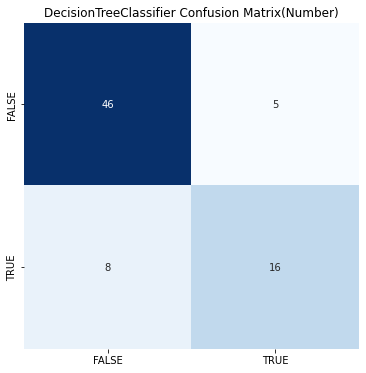

In [49]:
plt.figure(figsize=(6,6))
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap((cf_matrix/np.sum(cf_matrix)*100),annot=True,fmt=".2f",cmap="Blues")
plt.title("DecisionTreeClassifier Confusion Matrix (Rate)")
plt.show()
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=["FALSE","TRUE"],yticklabels=["FALSE","TRUE"],cbar=False)
plt.title("DecisionTreeClassifier Confusion Matrix(Number)")
plt.show()

# **HYPERPARAMETER TUNNING USING GRID SEARCH CV**

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid={
    "max_depth": np.arange(1,10),
    "min_samples_split": [0.001,0.01,0.1,0.2,0.02,0.002],
    "criterion":["gini","entropy", None],
    "max_leaf_nodes":np.arange(1,10),
    "class_weight": ["balanced", None]}
clf_2=DecisionTreeClassifier()
grid=GridSearchCV(clf_2,param_grid,n_jobs=-1,verbose=2,cv=10)
grid.fit(x_train,y_train)
grid.best_params_

Fitting 10 folds for each of 2916 candidates, totalling 29160 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
11880 fits failed out of a total of 29160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1

-----------

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_split': 0.001}

# **IMPLEMENTING THE HYPERPARAMETERS**

Accuracy Score: 0.7733
Decision Tree Classifir f1-score         : 0.6383
Decision Tree Classifir precision        : 0.6522
Decision Tree Classifir recall           : 0.6250
Decision Tree Classifir roc auc score    : 0.7341

               precision    recall  f1-score   support

           0       0.84      0.83      0.83        52
           1       0.62      0.65      0.64        23

    accuracy                           0.77        75
   macro avg       0.73      0.74      0.74        75
weighted avg       0.78      0.77      0.77        75



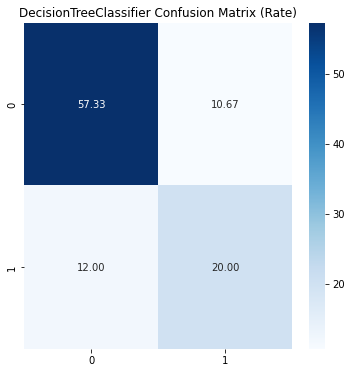

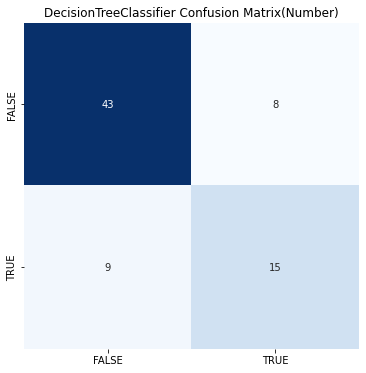

In [52]:
clf_2=DecisionTreeClassifier(class_weight="balanced",
                             criterion="entropy",
                             max_depth=7,
                             max_leaf_nodes=9,
                             min_samples_split=0.1,
                             random_state=0)
clf_2.fit(x_train,y_train)
y_pred=clf_2.predict(x_test)
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print("Decision Tree Classifir f1-score         : {:.4f}".format(f1_score(y_test,y_pred)))
print("Decision Tree Classifir precision        : {:.4f}".format(precision_score(y_test,y_pred)))
print("Decision Tree Classifir recall           : {:.4f}".format(recall_score(y_test,y_pred)))
print("Decision Tree Classifir roc auc score    : {:.4f}".format(roc_auc_score(y_test,y_pred)))
print("\n", classification_report(y_pred,y_test))
plt.figure(figsize=(6,6))
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap((cf_matrix/np.sum(cf_matrix)*100),annot=True,fmt=".2f",cmap="Blues")
plt.title("DecisionTreeClassifier Confusion Matrix (Rate)")
plt.show()
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=["FALSE","TRUE"],yticklabels=["FALSE","TRUE"],cbar=False)
plt.title("DecisionTreeClassifier Confusion Matrix(Number)")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


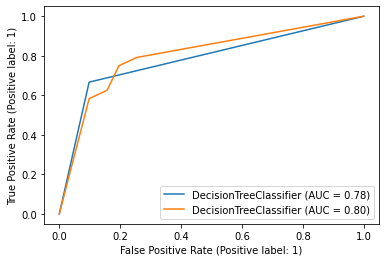

In [53]:
from sklearn.metrics import plot_roc_curve
fig=plot_roc_curve(clf_1,x_test,y_test)
fig=plot_roc_curve(clf_2,x_test,y_test,ax=fig.ax_)
plt.show()